In [1]:
import pandas as pd

pd.set_option("display.max_columns", 50)
df = pd.read_csv("../Data/SCMS_Delivery_History.csv")
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
ID                              10324 non-null int64
Project Code                    10324 non-null object
PQ #                            10324 non-null object
PO / SO #                       10324 non-null object
ASN/DN #                        10324 non-null object
Country                         10324 non-null object
Managed By                      10324 non-null object
Fulfill Via                     10324 non-null object
Vendor INCO Term                10324 non-null object
Shipment Mode                   9964 non-null object
PQ First Sent to Client Date    10324 non-null object
PO Sent to Vendor Date          10324 non-null object
Scheduled Delivery Date         10324 non-null object
Delivered to Client Date        10324 non-null object
Delivery Recorded Date          10324 non-null object
Product Group                   10324 non-null object
Sub Classification           

In [3]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8158 entries, 21 to 10323
Data columns (total 33 columns):
ID                              8158 non-null int64
Project Code                    8158 non-null object
PQ #                            8158 non-null object
PO / SO #                       8158 non-null object
ASN/DN #                        8158 non-null object
Country                         8158 non-null object
Managed By                      8158 non-null object
Fulfill Via                     8158 non-null object
Vendor INCO Term                8158 non-null object
Shipment Mode                   8158 non-null object
PQ First Sent to Client Date    8158 non-null object
PO Sent to Vendor Date          8158 non-null object
Scheduled Delivery Date         8158 non-null object
Delivered to Client Date        8158 non-null object
Delivery Recorded Date          8158 non-null object
Product Group                   8158 non-null object
Sub Classification              8158 non-nul

In [4]:
item_count = df["Country"].value_counts().to_frame()
item_count.head()

,Country
South Africa,1364
Nigeria,952
Côte d'Ivoire,827
Uganda,724
Vietnam,661


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("dark")
item_count.head(10).plot(kind="bar", figsize=(14, 6), color='kymc', legend=False)
plt.show()

<Figure size 1400x600 with 1 Axes>

In [6]:
total_price = df.groupby(["Country"])["Pack Price"].sum().nlargest(15).to_frame()
total_price

,Pack Price
Country,
South Africa,23479.74
Vietnam,11015.11
Nigeria,10293.74
Côte d'Ivoire,10174.96
Uganda,9781.99
Mozambique,5782.10
Haiti,5029.42
Tanzania,4727.47
Zambia,3780.12


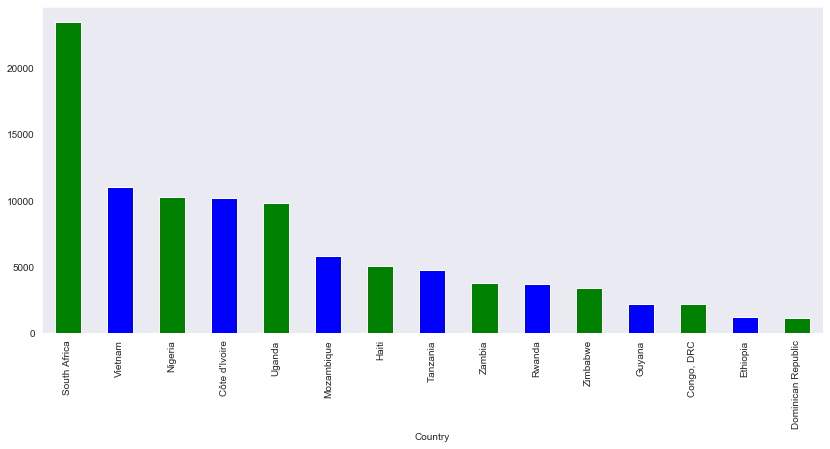

In [7]:
total_price.plot(kind="bar", figsize=(14, 6), legend=False, color="gb")
plt.show()

In [8]:
f_l_designation = df['First Line Designation'].value_counts().to_frame()
f_l_designation

,First Line Designation
Yes,5242
No,2916


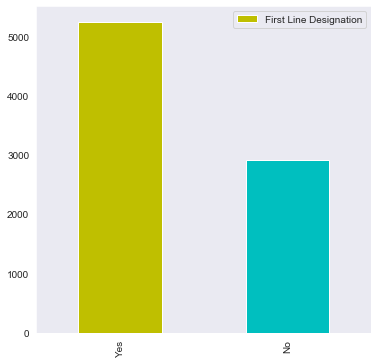

In [9]:
fig = f_l_designation.plot(kind="bar", figsize=(6, 6), color='yc')
plt.show()

In [10]:
shipping_mode = df["Shipment Mode"].value_counts().to_frame()
shipping_mode

,Shipment Mode
Air,4361
Truck,2780
Air Charter,650
Ocean,367


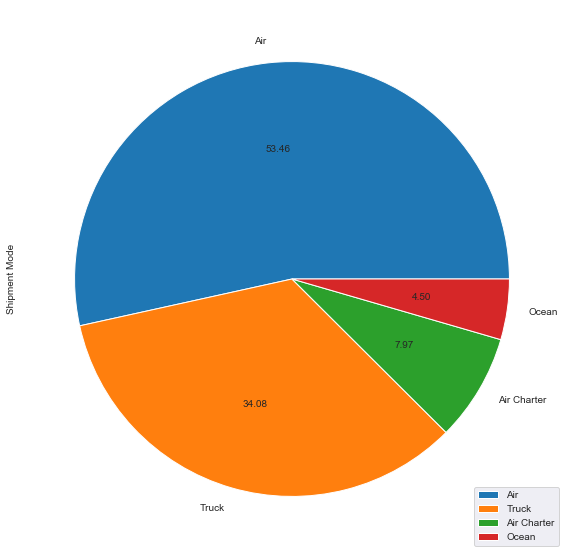

In [11]:
shipping_mode.plot(kind="pie", y="Shipment Mode", autopct='%.2f', figsize=(10, 10))

In [12]:
unique_item = df['Manufacturing Site'].unique()
unique_item

array(['BMS Meymac, France', 'Aurobindo Unit III, India',
       'ABBVIE Ludwigshafen Germany', 'Gilead(Nycomed) Oranienburg DE',
       'Ranbaxy, Paonta Shahib, India', 'Mylan (formerly Matrix) Nashik',
       'Roche Basel', 'GSK Ware (UK)', 'Novartis Pharma AG, Switzerland',
       'BI, Ingelheim, Germany', 'Ipca Dadra/Nagar Haveli IN',
       'MSD, Haarlem, NL', 'Aspen-OSD, Port Elizabeth, SA',
       'ABBVIE (Abbott) Logis. UK', 'Gland Pharma Ltd Pally Factory',
       'Cipla, Goa, India', 'GSK Mississauga (Canada)', 'GSK Aranda',
       'Hetero Unit III Hyderabad IN', 'ABBVIE (Abbott) France',
       'Strides, Bangalore, India.',
       'GSK Cape Town Factory (South Africa)', "MSD Midrand, J'burg, SA",
       'Boehringer Ing., Koropi, GR', 'GSK Crawley',
       'Novartis Pharma Suffern, USA',
       'Micro Labs Ltd. (Brown & Burk), India',
       'Meditab (for Cipla) Daman IN', 'Medopharm Malur Factory, INDIA',
       'Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo

In [13]:
item_data = df[df['Shipment Mode'] == 'Air']
item_data["Unit of Measure (Per Pack)"].describe().to_frame()

,Unit of Measure (Per Pack)
count,4361.000000
mean,89.330429
std,95.493101
min,5.000000
25%,30.000000
50%,60.000000
75%,90.000000
max,1000.000000


In [14]:
manufactuing_sites = df.groupby("Manufacturing Site").size().nlargest(10).to_frame()
manufactuing_sites

,0
Manufacturing Site,
"Aurobindo Unit III, India",2978
Mylan (formerly Matrix) Nashik,1407
Hetero Unit III Hyderabad IN,868
"Cipla, Goa, India",624
"Strides, Bangalore, India.",528
ABBVIE Ludwigshafen Germany,350
ABBVIE (Abbott) Logis. UK,204
"BMS Meymac, France",129
"Aspen-OSD, Port Elizabeth, SA",125


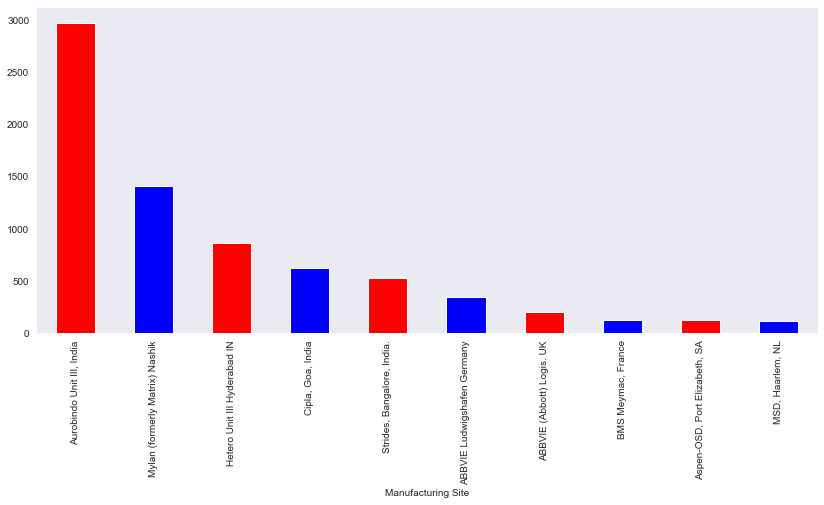

In [15]:
manufactuing_sites.plot(kind="bar", figsize=(14, 6), color='rb', legend=False)
plt.show()

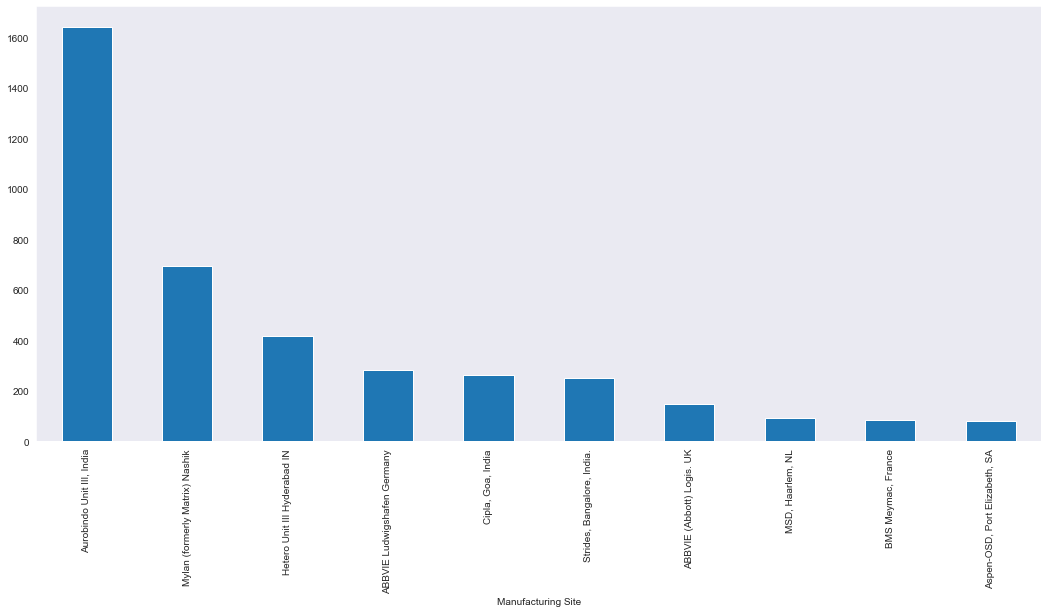

In [16]:
item_data.groupby("Manufacturing Site").size().nlargest(10).to_frame().plot(kind="bar", figsize=(18, 8), legend=False)
plt.show()

In [17]:
pack_price = df.groupby('Shipment Mode')['Pack Price'].mean().to_frame().sort_values(by='Pack Price', ascending=False)
pack_price

,Pack Price
Shipment Mode,
Air,13.510773
Truck,12.386518
Air Charter,8.638462
Ocean,6.160981


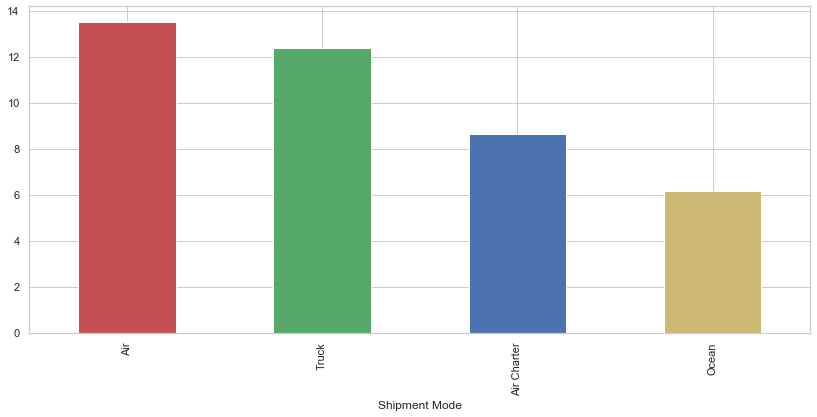

In [18]:
sns.set(style="whitegrid")
pack_price.plot(kind="bar", figsize=(14, 6), color='rgby', legend=False)
plt.show()